# Tarea 2 - Parcial #
## Calderón Velasco Andrés Sebastian ##
### 16 de febrero de 2022 ###
Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

1. Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
2. Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA).
3. Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla Ubicación Geográfica de Países - Google Developer. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA.
4. En su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.
Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:

- En el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.
- La figura tiene etiquetas adecuadas en los ejes de la visualización.
- Se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión.

In [20]:
import re
import itertools
import csv

In [26]:
with open('pubmed_results.txt', errors = 'ignore') as f:
    mi_pubmed = f.read()

In [27]:
len(mi_pubmed)

1120347

In [42]:
# Minado paises
mi_pubmed = re.sub(r'\n\s{6}', ' ', mi_pubmed)

# Se extraen los países
pub1 = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", mi_pubmed)
textounico = list(set(pub1))
textounico.sort()
a = textounico
# Se observan los países que se repiten y si hay elementos intrusos que no son países
print(a) 
    
# Se elimina lo que no coincide con un país y repeticiones:
b = textounico
b.remove(', LLC.')
b.remove(', Col.')
b.remove(', Jacq.')
b.remove(', Inc.')
b.remove(', Gto.')
b.remove(', Ltd.')
b.remove(', MSTRG.')
b.remove(', ROC.')
b.remove(', Ctra.')
b.remove(', Eucgr.')
b.remove(', Engesserstr.')
print() # Enter
# Vemos la lista sin intrusos, se impriemen solo los 20 primeros terminos
print('Ejemplos de como se vera la lista de países: ', b[:20]) 
    
# Eliminar los caracteres que no deberían estar
    
c = "".join(b)
d = c.split(", ")
e = "".join(d)
f = e.split(".")
f.pop(8)
unique_zipcodes = f
print()
# imprimimos los 15 primeros elementos de la lista como verficación
print('Los 15 primeros caracteres de la lista de países son: ', unique_zipcodes[:15])

[', Argentina.', ', Australia.', ', Brazil.', ', Canada.', ', Chile.', ', China.', ', Col.', ', Croatia.', ', Ctra.', ', Ecuador.', ', Egypt.', ', Engesserstr.', ', Eucgr.', ', Finland.', ', France.', ', Germany.', ', Gto.', ', Inc.', ', India.', ', Indonesia.', ', Iran.', ', Italy.', ', Jacq.', ', Japan.', ', Kenya.', ', LLC.', ', Lebanon.', ', Ltd.', ', MSTRG.', ', Malaysia.', ', Mexico.', ', Morocco.', ', Netherlands.', ', Pakistan.', ', Poland.', ', Portugal.', ', ROC.', ', Russia.', ', Serbia.', ', Spain.', ', Sweden.', ', Thailand.', ', USA.', ', Ukraine.', ', Vietnam.']

Ejemplos de como se vera la lista de países:  [', Argentina.', ', Australia.', ', Brazil.', ', Canada.', ', Chile.', ', China.', ', Croatia.', ', Ecuador.', ', Egypt.', ', Finland.', ', France.', ', Germany.', ', India.', ', Indonesia.', ', Iran.', ', Italy.', ', Japan.', ', Kenya.', ', Lebanon.', ', Malaysia.']

Los 15 primeros caracteres de la lista de países son:  ['Argentina', 'Australia', 'Brazil', 'Canada'

In [43]:
len(unique_zipcodes) # número de paises 

34

In [44]:
import pandas as pd # Se importa la libreria pandas para usar documentos de excel 

In [46]:
# importación de la tabla con las coordenadas de los países
data = pd.read_csv('./Paises_coordenadas.csv', engine='python', skipfooter=3)
data.head(15)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [47]:
# Obtenemos los datos para la elaboración de gráficas

datos_nombre = data[data.name.isin(unique_zipcodes)]
datos_paises = data[data.country.isin(unique_zipcodes)]
all_data =pd.concat([datos_nombre,datos_paises]).drop_duplicates().sort_values('name')
all_data.head(15)

,country,latitude,longitude,name
10,AR,-38.416097,-63.616672,Argentina
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
35,CA,56.130366,-106.346771,Canada
43,CL,-35.675147,-71.542969,Chile
45,CN,35.861660,104.195397,China
95,HR,45.100000,15.200000,Croatia
59,EC,-1.831239,-78.183406,Ecuador
66,FI,61.924110,25.748151,Finland
71,FR,46.227638,2.213749,France


Matplotlib is building the font cache; this may take a moment.


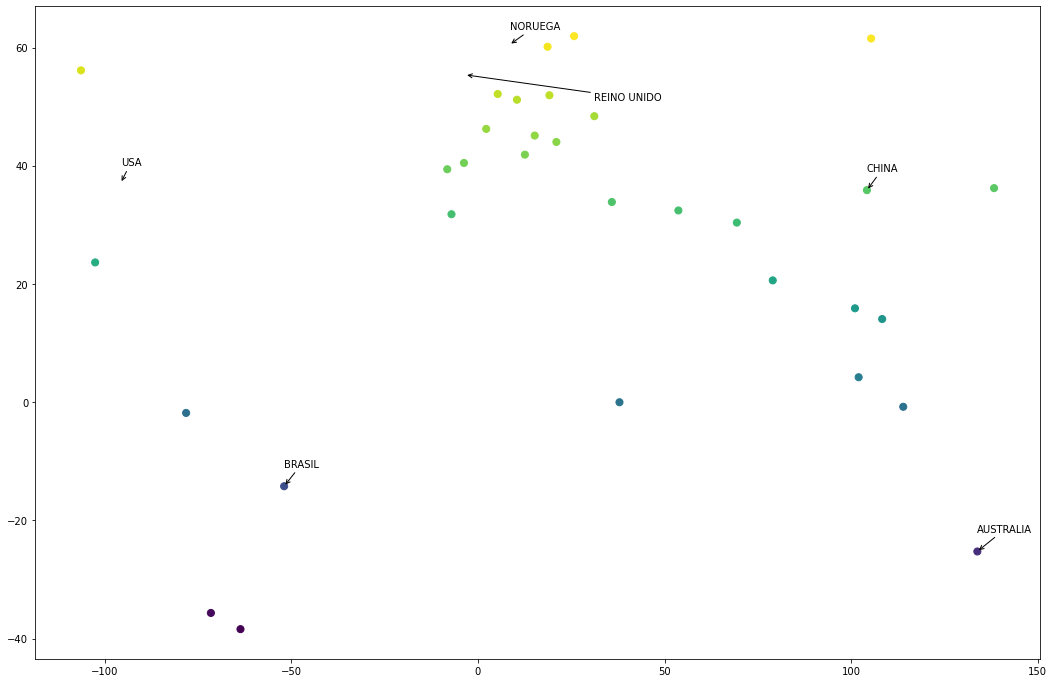

In [48]:
# Gráfica

import matplotlib.pyplot as plt
plt.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)


ard = dict(arrowstyle="->")
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('BRASIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('NORUEGA', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)
plt.annotate('REINO UNIDO', xy = (-3.435973,55.378051), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

# GRAFICAMOS TODOS LOS RESULTADOS RESALTANDO: USA REINO UNIDO BRASIL CHINA AUSTRALIA NORWAY